## **Ridge Regression**


##### **Derivation of the gradient and SGD update rule for linear regression with L2 (ridge) regularisation.**

The optimal error function $E(\bold{w})$ for a linear regression is the sum of squares. 
ie; \
\
$ E(\bold{w}) = \frac{1}{2}\sum_{n =1}^{N}(t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})^2$ \
\
Given the regularsation term for L2 regularisation $\Omega(\bold{w})$ \
\
$\Omega(\bold{w}) = \frac{\lambda}{2}\sum_{n = 1}^{N}||\bold{w}||^2$ \
\
Therefore the error function for a a linear regression with L2 regularisation  $E_R (\bold{w}) $ becomes: \
\
$E_R (\bold{w}) = E(\bold{w}) + \Omega(\bold{w}) = \frac{1}{2}\sum_{n =1}^{N}((t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})^2 + \frac{\lambda}{2}||\bold{w}||^2)$ \
\
We can define the general loss function $E(\bold{w})$ as the sum of losses over each data point i.e; \
\
$E_R(\bold{w}) := \sum_{n}E_n(\bold{w}) $      \
\
where      \
\
$ E_n(\bold{w}) = \frac{1}{2}(t_n - \bold{w}^T\phi(x_n))^2 + \frac{\lambda}{2}\bold{w}^2  $ \
\
The weight update rule of SGD is the following: \
\
$\bold{w}^{(\tau)} = \bold(w)^{(\tau-1)} - \eta^{(\tau)}\nabla_\bold{w}E(\bold{w}^{(\tau-1)} ) $ \
\
Thus, we need to compute the gradient our our regularised error function in order to define the weght update step. We can do that as follows: \
\
$\nabla_\bold{w}E_R(\bold{w}) = \nabla_\bold{w}(\frac{1}{2}\sum_{n =1}^{N}((t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})^2 )+ \nabla_\bold{w}(\frac{\lambda}{2}||\bold{w}||^2))$ \
\
computing the first gradient of the first term; We can use the chain rule to find the following\
\
$\nabla_\bold{w}(\frac{1}{2}\sum_{n =1}^{N}(t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})^2 ) = -\sum_{n=1}^{N}(t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})\boldsymbol{\phi}(x_n)$ 
\
\
computing the gradient of the second term: 

$\nabla_\bold{w}(\frac{\lambda}{2}||\bold{w}||^2)) = \lambda\bold{w}$
\
\
Therefore the gradient of the regularised error function becomes: 
\
\
$\nabla_\bold{w}E_R(\bold{w}) = -\sum_{n=1}^{N}(t_n - \boldsymbol{\phi}(x_n) \cdot \bold{w})\boldsymbol{\phi}(x_n) + \lambda\bold{w}$ 
\
\
We can rewrite this sum as the following matrix multiplication: 
\
\
$\tilde{\boldsymbol{\Phi}}^T(\tilde{\boldsymbol{\Phi}}\mathbf{w} - \tilde{\mathbf{t}}) + \lambda\bold{w}$
\
\
where \
$\tilde{\boldsymbol{\Phi}} = $ the feture matrix \
$\tilde{\mathbf{t}} = $ the vector of all target values 
\
\
plugging this into the weight update fuction, we recieve the following reuslt: 
\
\
$\bold{w}^{(\tau)} = \bold{w}^{(\tau-1)} - \eta^{(\tau)}\nabla_\bold{w}E(\bold{w}^{(\tau-1)} ) $
\
$=$
\
$\bold{w}^{(\tau)} = \bold{w}^{(\tau-1)} + \eta^{(\tau)}[\tilde{\boldsymbol{\Phi}}^T(\tilde{\boldsymbol{\Phi}}\mathbf{w}^{(\tau-1)} - \tilde{\mathbf{t}}) + \lambda\bold{w}^{(\tau-1)}] $






### **Implementing Ridge**

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

Stochastic Gradient Descent (SGD) solver for linear regression with L2 (ridge) regularisation.

This implementation performs mini-batch SGD to minimise the objective: 
    (1 / (2n)) · ||Xw − y||² + (λ / 2) · ||w||²

In [ ]:
    
class SGDRidgeRegression:
    """

    :Parameters:
    batch_size : int, default=1 -> Number of samples used per gradient update (1 = true SGD).
    eta : float, default=0.01 -> Learning rate (step size).
    tau_max : int, default=10000 -> Maximum number of SGD iterations.
    epsilon : float, default=1e-5 -> Stopping criterion based on change in weights.
    lam : float, default=1e-4 -> L2 regularisation strength (lambda).
    random_state : int or None -> Seed for reproducible sampling.

    :Attributes:
    coef_ : ndarray of shape (n_features,) -> Final fitted weight vector.
    w_ : ndarray of shape (n_iter + 1, n_features) -> Weight history across iterations.
    """
    def __init__(self, batch_size=1, eta=0.01, tau_max=10000, epsilon=0.00001, lam = 0.0001,  random_state=None):
        self.eta = eta # learning rate
        self.tau_max = tau_max # maximum number of iterations
        self.epsilon = epsilon # stopping criterion
        self.random_state = random_state # random seed
        self.batch_size = batch_size # batch size
        self.lam = lam # regularization parameter
        
    def fit(self, x, y):
        """
        Fit ridge regression weights using (mini-batch) stochastic gradient descent.

        :Parameters:
        x : array-like of shape (n_samples, n_features) -> Training input data.
        y : array-like of shape (n_samples,) -> Target values.

        :Output:
        self : object -> Fitted estimator.
        """
        RNG = np.random.default_rng(self.random_state)
        n, p = x.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))

        for tau in range(1, self.tau_max+1):
            idx = RNG.choice(n, size=self.batch_size, replace=True)
            grad =  x[idx].T.dot(x[idx].dot(self.w_[tau-1])-y[idx])/self.batch_size + self.lam*self.w_[tau-1]    # gradient of the loss function
            self.w_[tau] = self.w_[tau-1] - self.eta*grad
            if np.linalg.norm(self.w_[tau]-self.w_[tau-1]) < self.epsilon:
                break

        self.coef_ = self.w_[tau] 
        self.w_ = self.w_[:tau+1]
        
        return self

    def predict(self, x):
        """
        Predict target values for given samples.

        :Parameters:
        x : array-like of shape (n_samples, n_features) -> Input samples.

        :Output:
        y_pred : ndarray of shape (n_samples,) -> Predicted target values.
        """
        return x.dot(self.coef_)

**Utilising a synthetic data generator to plot the target function and synthetic data points**


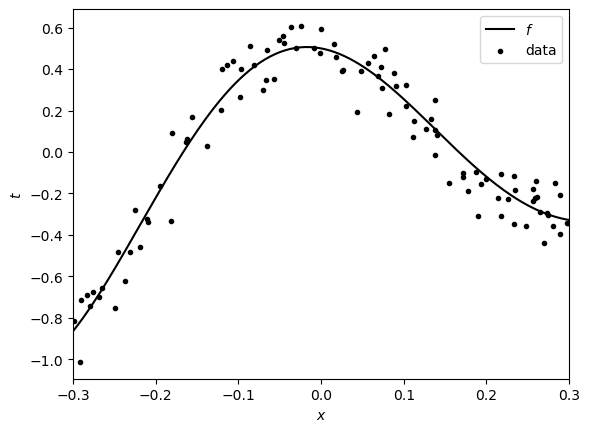

In [ ]:
def f(x):
    """
    Target function used to generate synthetic data.

    :Parameters:
    x : array-like -> Input values.

    :Output:
    y : ndarray -> Function values evaluated at x.
    """
    return np.cos(3*np.pi*x)/(2+3*x)

def make_additive_noise_data(n, f, a, b, noise=0.1, random_state=None):
    """
    
    Noisy observations are generated from a given target function by sampling input values
    uniformly from the interval [a, b] and adding Gaussian noise to the corresponding function outputs.
    
    :Parameters:
    n : int -> Number of data points to generate.
    f : callable -> Target function.
    a : float -> Lower bound of input domain.
    b : float -> Upper bound of input domain.
    noise : float, default=0.1 -> Standard deviation of Gaussian noise.
    random_state : int or None -> Seed for reproducible randomness.

    :Output:
    x : ndarray of shape (n, 1) -> Input samples.
    y : ndarray of shape (n, 1) -> Noisy target values.
    """
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

def plot_function(f, a, b, models=[], data=None, ax=None, ax_labels=True, legend=True):
    """
    Plot a target function along with model predictions and optional data.

    :Parameters:
    ----------
    f : callable -> Target function to plot.
    a : float -> Lower bound of plotting range.
    b : float -> Upper bound of plotting range.
    models : list, default=[] -> List of fitted models with a predict method.
    data : tuple or None -> (x, y) data points to plot.
    ax : matplotlib axis or None -> Axis to plot on.
    ax_labels : bool, default=True -> Whether to show axis labels.
    legend : bool, default=True -> Whether to display a legend.
    """
    ax = plt.gca() if ax is None else ax
    xx = np.linspace(a, b, 200).reshape(-1, 1)
    if len(models)==1:
        ax.fill_between(xx.squeeze(), f(xx).squeeze(), models[0].predict(xx).squeeze(), alpha=0.3)
        ax.plot(xx, models[0].predict(xx), label='$y$')
    if len(models) > 1:
        for model in models: ax.plot(xx, model.predict(xx), color='gray', alpha=0.5)
    ax.plot(xx, f(xx), color='black', label='$f$')
    if data is not None:
        x, y = data
        ax.scatter(x, y, marker='.', color='black', label='data')
    if ax_labels:
        ax.set_xlabel('$x$')
        ax.set_ylabel('$t$')
    if legend: ax.legend()
    ax.margins(x=0)

plot_function(f, -0.3, 0.3, data=make_additive_noise_data(100, f, -0.3, 0.3, random_state=0))
plt.show()



### **Evaluating Linear Ridge Regression on Synthetic Nonlinear Data**

Now a synthetic dataset is generated from a known nonlinear target function with added Gaussian noise. A linear ridge regression model trained using stochastic gradient descent is then fitted to a small training sample and evaluated on a larger test set. This setup allows the generalisation performance of the model to be assessed and highlights the limitations of linear models when approximating nonlinear functions.


mean error:  0.15439575285927173
coef:  [0.45756368]


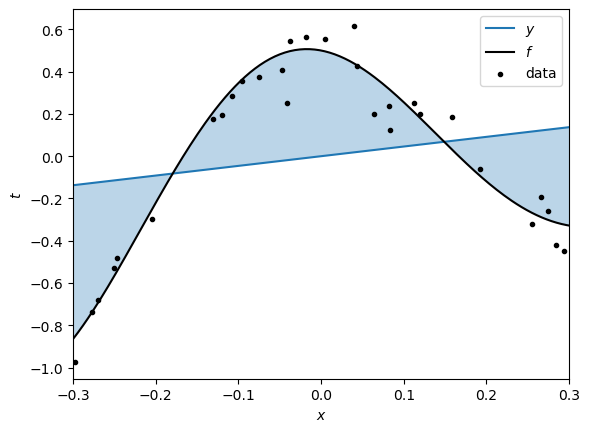

In [ ]:
x_test, y_test = make_additive_noise_data(1000, f, -0.3, 0.3, random_state=None)
x_train, y_train = make_additive_noise_data(30, f, -0.3, 0.3, random_state=None)

linear = SGDRidgeRegression()
linear.fit(x_train, y_train)
print("mean error: " , ((y_test - linear.predict(x_test))**2).mean())
print("coef: ", linear.coef_)   
plot_function(f, -0.3, 0.3, [linear], (x_train, y_train))

**Inspecting the results of the ridge regression** 

We can see from the plot above that using a linear regression method works only to a point. in order to increase the accuracy of this plot we need to use a polynomial of higher order  to fit the function curve. 

##### **The function to generate a higher degree polynomial curve** 

In [ ]:
class PolynomialFeatures:
    """
    Generate polynomial feature expansions of a single input variable.
    This transformer maps an input feature x to a polynomial feature matrix
    [1, x, x^2, ..., x^degree].

    :Parameters:
    degree : int -> Maximum degree of the polynomial features.
    """
    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        """
        Fit the polynomial feature transformer.
        This method does not learn any parameters and is included for
        compatibility with sklearn-style pipelines.

        :Parameters:
        x : array-like -> Input data.
        y : Ignored -> Included for interface compatibility.

        :Output:
        self : object -> Fitted transformer.
        """
        return self

    def transform(self, x, y=None):
        """
        Transform input data into polynomial feature space.

        :Parameters:
        x : array-like of shape (n_samples, 1) -> Input feature values.
        y : Ignored -> Included for interface compatibility.

        :Output:
        X_poly : ndarray of shape (n_samples, degree + 1) -> Polynomial feature matrix.
        """
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        """
        Fit the transformer and return the transformed input.

        :Parameters:
        x : array-like -> Input data.
        y : Ignored -> Included for interface compatibility.

        :Output:
        X_poly : ndarray -> Polynomial feature matrix.
        """
        self.fit(x, y)
        return self.transform(x, y)
    


**Reshaping the train and test data for processing in a polynomial degree > 1**

In [9]:
x_test, y_test = x_test.squeeze(), y_test.squeeze()
x_train, y_train = x_train.squeeze(), y_train.squeeze() 
print(x_train.shape, y_train.shape) 
print(x_test.shape, y_test.shape)   

(30,) (30,)
(1000,) (1000,)


**Creating a ridge regression model of degree 5 and plot the results against the true function and training data**

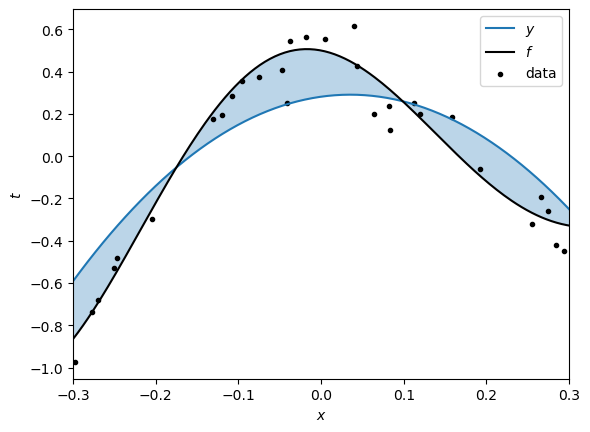

In [10]:

ridge2 = make_pipeline(PolynomialFeatures(5), SGDRidgeRegression(eta=0.1, tau_max=10000, epsilon=0.00001, lam = 0.0001,  random_state=None))
ridge2.fit(x_train, y_train)

plot_function(f, -0.3, 0.3, models=[ridge2], data=(x_train, y_train))

### **Hyperparameter Tuning of the Regularisation Parameter λ**

In [11]:
lam_values = np.geomspace(10**-10, 0.1, 101, endpoint=True)
lam_values.shape

(101,)

**Tesing a single model on each each value of lambda**

In [12]:
test_errors_inner = []
train_errors_inner = []
for lam in lam_values:
    ridge = make_pipeline(PolynomialFeatures(5), SGDRidgeRegression(eta=0.1, tau_max=10000, epsilon=0.00001, lam = lam,  random_state=None))
    ridge.fit(x_train, y_train)
    test_errors_inner.append(mean_squared_error(y_test, ridge.predict(x_test)))
    train_errors_inner.append(mean_squared_error(y_train, ridge.predict(x_train)))



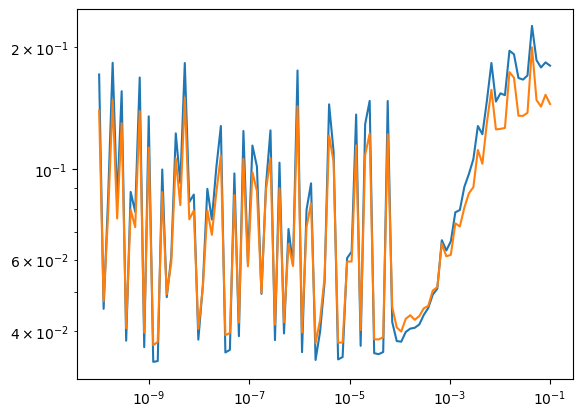

In [13]:
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.plot(lam_values, train_errors_inner, label='train error')
plt.plot(lam_values, test_errors_inner, label='test error')

Each value of λ is evaluated by fitting the model ten times and computing the corresponding mean squared error. This repeated evaluation helps account for randomness in the training process.

In [14]:
test_errors_outer = []
train_errors_outer = []
coef_outer = []
for i in range(1, 10):

    x_test, y_test = make_additive_noise_data(100, f, -0.3, 0.3, random_state=i)
    x_train, y_train = make_additive_noise_data(20, f, -0.3, 0.3, random_state=i)
    x_test, y_test = x_test.squeeze(), y_test.squeeze()
    x_train, y_train = x_train.squeeze(), y_train.squeeze() 

    test_errors_inner = []
    train_errors_inner = []
    coef_inner = []

    for lam in lam_values:
        ridge = make_pipeline(PolynomialFeatures(5), SGDRidgeRegression(eta=0.5, tau_max=10000, epsilon=0.0000001, lam = lam,  random_state=None))
        ridge.fit(x_train, y_train)

        test_errors_inner.append(mean_squared_error(y_test, ridge.predict(x_test)))
        train_errors_inner.append(mean_squared_error(y_train, ridge.predict(x_train)))
    test_errors_outer.append(test_errors_inner)
    train_errors_outer.append(train_errors_inner)

mean_errors = np.mean(test_errors_outer, axis=0)    



### **Plotting the results**

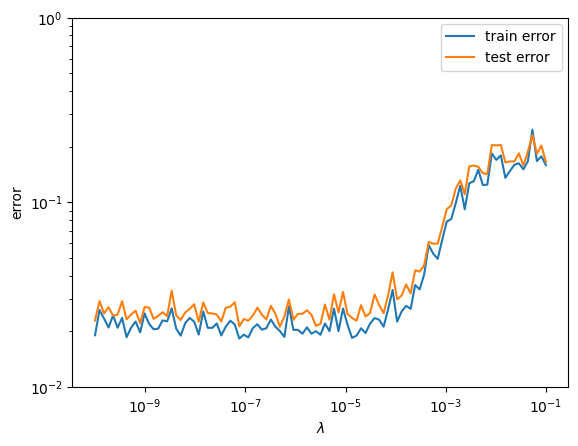

In [54]:

mean_test_errors = np.mean(test_errors_outer, axis=0)
mean_train_errors = np.mean(train_errors_outer, axis=0) 

plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.gca().set_ylim([0.01, 1])
plt.plot(lam_values, mean_train_errors, label='train error')
plt.plot(lam_values, mean_test_errors, label='test error')
plt.gca().set_xlabel('$\lambda$')
plt.gca().set_ylabel('error') 
plt.legend()
plt.show()


### **Discussion**

As the regularisation parameter λ increases, the mean error rate for both the training and testing datasets also increases. This behaviour indicates the onset of **underfitting**.

This effect is likely due to the regularisation term becoming excessively large, which over-penalises the model weights. As a result, the model loses its ability to capture the underlying structure and nuance of the data, leading to higher error rates on both the training and test sets.